In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('dengue_features_train.csv')
data_test = pd.read_csv('dengue_features_test.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [4]:
data_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [6]:
data_labels_train = pd.read_csv('dengue_labels_train.csv')
trainingData = pd.merge(data_train, data_labels_train, how = 'left', left_on = ['city', 'year', 'weekofyear'], right_on = ['city', 'year', 'weekofyear'])

In [8]:
trainingData = trainingData.dropna()

In [9]:
trainingData.week_start_date = pd.to_datetime(trainingData.week_start_date)

In [10]:
sj = trainingData[trainingData['city'] == 'sj']
iq = trainingData[trainingData['city'] == 'iq']

Text(0,0.5,'Total cases')

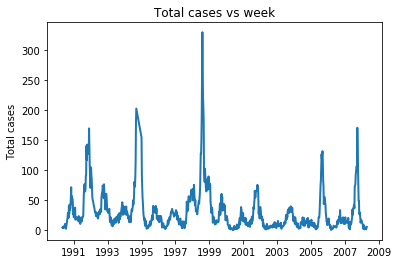

In [12]:
plt.plot(sj.week_start_date, sj.total_cases, linewidth =2)
plt.title('Total cases vs week')
plt.ylabel('Total cases')

Text(0,0.5,'Total cases')

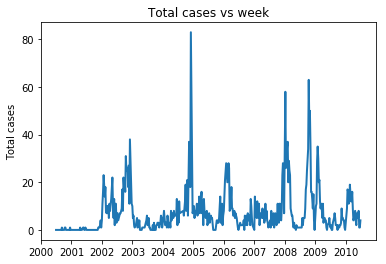

In [13]:
plt.plot(iq.week_start_date, iq.total_cases, linewidth =2)
plt.title('Total cases vs week')
plt.ylabel('Total cases')

Text(0,0.5,'Precipitation (mm)')

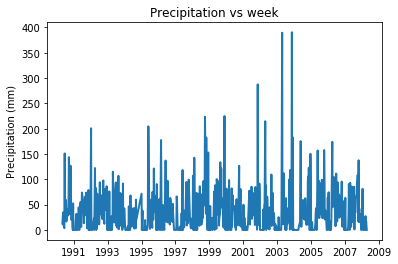

In [14]:
plt.plot(sj.week_start_date, sj.precipitation_amt_mm, linewidth = 2)
plt.title('Precipitation(mm) vs week')
plt.ylabel('Precipitation (mm)')

Text(0,0.5,'Precipitation (mm)')

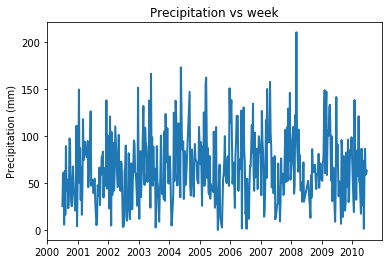

In [15]:
plt.plot(iq.week_start_date, iq.precipitation_amt_mm, linewidth = 2)
plt.title('Precipitation(mm) vs week')
plt.ylabel('Precipitation (mm)')

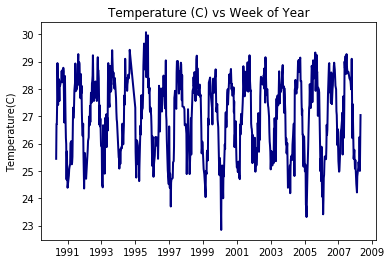

In [19]:
plt.plot(sj.week_start_date, sj.station_avg_temp_c, linewidth = 2, color = 'navy')
plt.title('Temperature (C) vs Week of Year')
plt.ylabel('Temperature(C)');

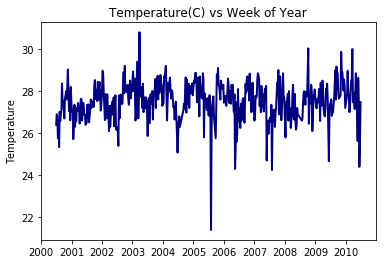

In [18]:
plt.plot(iq.week_start_date, iq.station_avg_temp_c, linewidth = 2, color = 'navy')
plt.title('Temperature(C) vs Week of Year')
plt.ylabel('Temperature(C)');

In [ ]:
# Compute the correlation matrix
sj_corr = sj.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(sj_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sj_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#This shows us that there is a significant correlation between the total cases and the week of the year

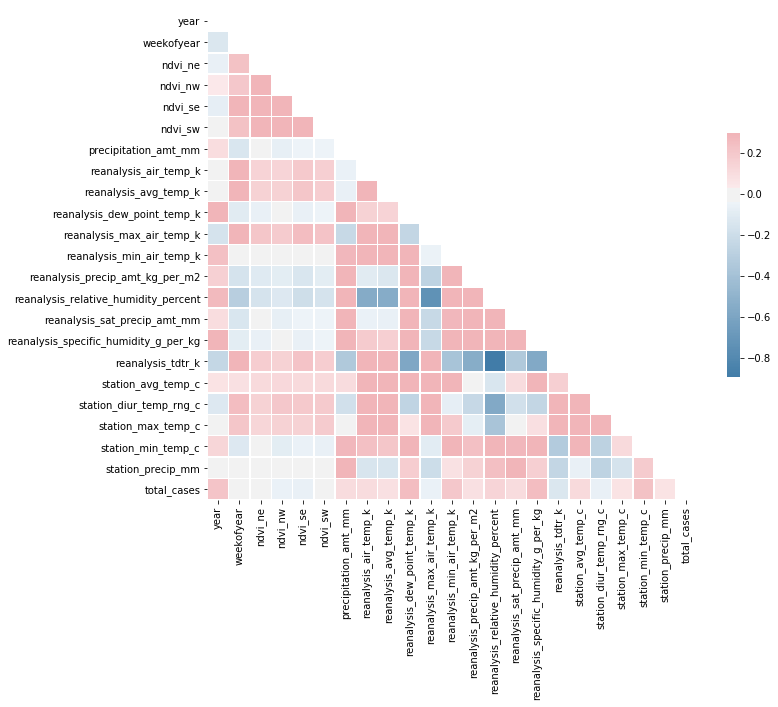

In [21]:
# Compute the correlation matrix
iq_corr = iq.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(iq_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(iq_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})